# 도서 분야 : 생활 취미 레저

- 출처

    - 네이버 데이터랩
        - 도서 -> 건강/취미 분야  2021-07-09 ~ 2022-07-09 (일별)

        - 통계다양한 분야에서 클릭이 발생한 검색어의 클릭량 추이 및 연령별/성별 정보를 상세하게 조회

        - 건강/취미 클릭량 추이 퍼센트로 되어있음
       
    - 출판유통통합전산망
        - 도서 -> 생활,취미,레저  2021-07 ~ 2022-08 (월별)
        
        - 해당 데이터는 교보문고, 알라딘, 영풍문고, 예스이십사, 지역서점과 연계 되어있다.(예스이십사, 알라딘의 경우 : '21년 8월까지는 일부, '21년 9월부터는 전체 데이터 반영)

        - 현재는 종이책만 판매 통계를 확인할 수 있으며, 전자책 및 오디오북은 추후 공개 예정이다.
        
- 1차 : 스포츠, 레저, 생활, 건강

- 2차 : 도서 -> 생활, 취미, 레저 분야
    
    

## 주제
- 1. 오프라인 온라인 부수 비교
- 2. 전체 부수 중 생활 취미 레저 부수 퍼센트의 변화
- 3. 월별로 묶어서 성별, 나이별 비교
- 4. 클릭 수와 부수 상관계수

###### 네이버 클릭 수 파일

In [84]:
# 모듈 로딩
import pandas as pd, os
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib 한글 Font 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../../../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [85]:
# 파일을 여는 함수
DIR=os.listdir('./')      # os 모듈을 사용해 현재 파일의 경로를 알아보았습니다.
# DIR

def open_file():
    file=[]
    for i in range(5,17):
        df=pd.read_csv('./'+DIR[i],header=7)        
        df[DIR[i][:-4]]=df['건강/취미']             
        df.drop(['날짜','건강/취미'],axis=1,inplace=True)      # 날짜 건강취미 컬럼을 없애고 저장
        file.append(df)            # 내용을 전부 리스트에 담는다
    return file

file=open_file()        # 함수를 호출하고 값(데이터프레임)을 file에 담는다
file

[     생활취미레저_남성_10대
 0               24
 1               17
 2               20
 3               29
 4               25
 ..             ...
 361             31
 362             18
 363             55
 364             46
 365              7
 
 [366 rows x 1 columns],
      생활취미레저_남성_20대
 0               14
 1               17
 2               22
 3               25
 4               20
 ..             ...
 361             25
 362             23
 363             24
 364             16
 365              3
 
 [366 rows x 1 columns],
      생활취미레저_남성_30대
 0               27
 1               27
 2               24
 3               34
 4               44
 ..             ...
 361             57
 362             52
 363             51
 364             25
 365              4
 
 [366 rows x 1 columns],
      생활취미레저_남성_40대
 0               29
 1               23
 2               32
 3               39
 4               34
 ..             ...
 361             56
 362             60
 363             50

In [86]:
# 해당 기간의 원하는 형태의 데이터프레임 형성
hl_naver=pd.concat(file,axis=1)          # 파일을 가지고 concat 으로 열 방향으로 하나의 데이터프레임으로 합친다.
dt=pd.date_range('2021-07-09','2022-07-09',freq='D')
hl_naver.insert(0,'날짜',dt)           # hl_naver 데이터프레임의 0번째 컬럼 위치에 컬러명'날짜'로 dt값을 채운다
hl_naver

,날짜,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대
0,2021-07-09,24,14,27,29,21,25,34,19,26,23,24,17
1,2021-07-10,17,17,27,23,36,36,44,18,23,18,21,17
2,2021-07-11,20,22,24,32,42,44,45,22,28,25,27,15
3,2021-07-12,29,25,34,39,32,34,36,23,33,31,25,20
4,2021-07-13,25,20,44,34,24,26,47,24,37,33,32,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-07-05,31,25,57,56,38,64,60,15,47,53,52,25
362,2022-07-06,18,23,52,60,56,69,69,17,48,49,54,59
363,2022-07-07,55,24,51,50,53,48,44,14,48,41,43,38
364,2022-07-08,46,16,25,21,37,35,44,6,21,24,22,5


##### 부수 파일

In [87]:
# 파일 로딩 및 요약정보 확인
lhl_press=pd.read_csv('생활취미레저_.csv', encoding='cp949')
lhl_press.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   조회기간        12 non-null     object
 1   오프라인(매장)    13 non-null     object
 2   Unnamed: 2  13 non-null     object
 3   온라인         13 non-null     object
 4   Unnamed: 4  13 non-null     object
 5   지역서점        13 non-null     object
 6   Unnamed: 6  13 non-null     object
dtypes: object(7)
memory usage: 20.6+ KB


In [88]:
# 상위 파일 확인
lhl_press.head()

,조회기간,오프라인(매장),Unnamed: 2,온라인,Unnamed: 4,지역서점,Unnamed: 6
0,NaN,부수,금액,부수,금액,부수,금액
1,21년 07월,"231,749","2,047,604,747","141,819","1,574,848,680",0,0
2,21년 08월,"167,126","1,659,839,973","99,287","1,137,442,890",710,"12,414,900"
3,21년 09월,"97,397","1,692,702,644","239,437","4,367,137,234","2,631","51,616,210"
4,21년 10월,"98,828","1,693,285,211","131,184","2,451,608,950","2,857","51,362,960"


In [89]:
# 컬럼명 새로 지정, 0인덱스 행 없애기
lhl_press.columns=['날짜','오프라인(매장)_부수','오프라인(매장)_금액','온라인_부수','온라인_금액','지역서점_부수','지역서점_금액']   # hl_press 컬럼명을 지정한다
lhl_press.drop(0,inplace=True)      # 0인덱스 행 없애기

In [90]:
# 누락된 데이터 확인
lhl_press.isnull().sum()

날짜             361
오프라인(매장)_부수    361
오프라인(매장)_금액    361
온라인_부수         361
온라인_금액         361
지역서점_부수        361
지역서점_금액        361
dtype: int64

In [91]:
# 누락된 데이터 행 없애기
lhl_press.dropna(how='any',inplace=True)      # 누락된 데이터가 하나라도 있는 행은 없앤다

In [92]:
# 누락된 데이터 확인
lhl_press.isnull().sum()

날짜             0
오프라인(매장)_부수    0
오프라인(매장)_금액    0
온라인_부수         0
온라인_금액         0
지역서점_부수        0
지역서점_금액        0
dtype: int64

In [93]:
lhl_press.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   날짜           12 non-null     object
 1   오프라인(매장)_부수  12 non-null     object
 2   오프라인(매장)_금액  12 non-null     object
 3   온라인_부수       12 non-null     object
 4   온라인_금액       12 non-null     object
 5   지역서점_부수      12 non-null     object
 6   지역서점_금액      12 non-null     object
dtypes: object(7)
memory usage: 768.0+ bytes


In [94]:
lhl_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액
1,21년 07월,"231,749","2,047,604,747","141,819","1,574,848,680",0,0
2,21년 08월,"167,126","1,659,839,973","99,287","1,137,442,890",710,"12,414,900"
3,21년 09월,"97,397","1,692,702,644","239,437","4,367,137,234","2,631","51,616,210"
4,21년 10월,"98,828","1,693,285,211","131,184","2,451,608,950","2,857","51,362,960"
5,21년 11월,"104,133","1,783,264,963","54,732","942,613,143","5,701","103,993,445"
6,21년 12월,"114,042","1,949,964,387","66,899","1,070,268,090","6,390","118,362,091"
7,22년 01월,"70,700","1,264,806,830","52,280","918,299,625","3,342","62,510,870"
8,22년 02월,"83,896","1,468,581,532","49,722","864,683,740","2,163","40,384,915"
9,22년 03월,"100,004","1,747,270,076","53,684","919,790,273","1,873","34,129,580"
10,22년 04월,"81,953","1,393,616,647","51,929","890,271,242","1,870","35,410,980"


## 오프라인 온라인 부수 비교

In [95]:
# ',' 없애고 정수형으로 바꾸기
# 사용자 정의 함수
def to_int(num):
    num=num.replace(',', '')       # 원소 하나하나 콤마를 없애고 정수형으로 형변환 된 것을 반환받는다.
    num=int(num)
    return num

for col in lhl_press.columns[1:]:         # 컬럼 인덱스1번 부터 하나씩 받아서 값들을 어플라이를 통해 시리즈니까 원소 단위로 int함수를 호출해서
    lhl_press[col]=lhl_press[col].apply(to_int)

lhl_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액
1,21년 07월,231749,2047604747,141819,1574848680,0,0
2,21년 08월,167126,1659839973,99287,1137442890,710,12414900
3,21년 09월,97397,1692702644,239437,4367137234,2631,51616210
4,21년 10월,98828,1693285211,131184,2451608950,2857,51362960
5,21년 11월,104133,1783264963,54732,942613143,5701,103993445
6,21년 12월,114042,1949964387,66899,1070268090,6390,118362091
7,22년 01월,70700,1264806830,52280,918299625,3342,62510870
8,22년 02월,83896,1468581532,49722,864683740,2163,40384915
9,22년 03월,100004,1747270076,53684,919790273,1873,34129580
10,22년 04월,81953,1393616647,51929,890271242,1870,35410980


In [96]:
# 요약정보 확인
lhl_press.info()    # 형변환 됐는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   날짜           12 non-null     object
 1   오프라인(매장)_부수  12 non-null     int64 
 2   오프라인(매장)_금액  12 non-null     int64 
 3   온라인_부수       12 non-null     int64 
 4   온라인_금액       12 non-null     int64 
 5   지역서점_부수      12 non-null     int64 
 6   지역서점_금액      12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 768.0+ bytes


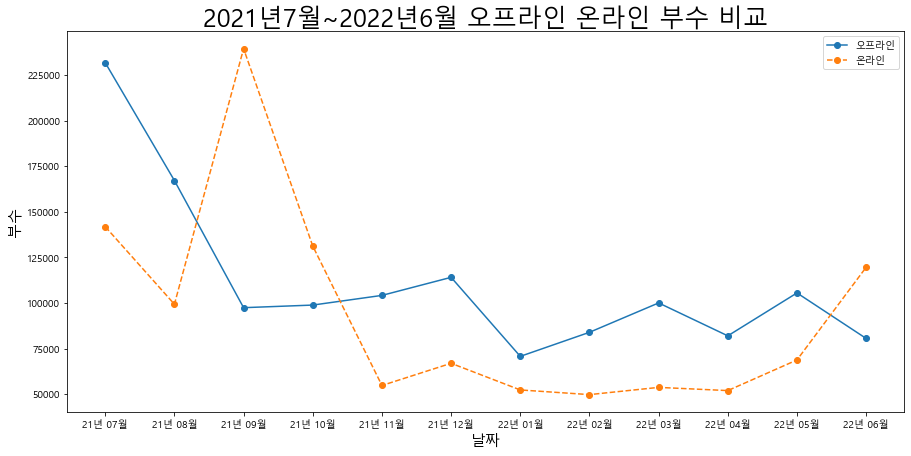

In [97]:
# 오프라인 온라인 부수 비교 그래프 그리기
plt.figure(figsize=(15,7))
plt.plot(lhl_press['날짜'],lhl_press['오프라인(매장)_부수'],'-o')
plt.plot(lhl_press['날짜'],lhl_press['온라인_부수'],'--o')
plt.title('2021년7월~2022년6월 오프라인 온라인 부수 비교',fontsize=25)
plt.legend(['오프라인','온라인'])
plt.xlabel('날짜',fontsize=15)
plt.ylabel('부수',fontsize=15)
plt.show()

- 온라인 부수가 21년 9월에 가장 많았고 전체적으로 온라인 부수보다 오프라인 부수가 많습니다.

## 전체 부수 중 생활취미레저 부수 퍼센트 변화

In [98]:
lhl_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액
1,21년 07월,231749,2047604747,141819,1574848680,0,0
2,21년 08월,167126,1659839973,99287,1137442890,710,12414900
3,21년 09월,97397,1692702644,239437,4367137234,2631,51616210
4,21년 10월,98828,1693285211,131184,2451608950,2857,51362960
5,21년 11월,104133,1783264963,54732,942613143,5701,103993445
6,21년 12월,114042,1949964387,66899,1070268090,6390,118362091
7,22년 01월,70700,1264806830,52280,918299625,3342,62510870
8,22년 02월,83896,1468581532,49722,864683740,2163,40384915
9,22년 03월,100004,1747270076,53684,919790273,1873,34129580
10,22년 04월,81953,1393616647,51929,890271242,1870,35410980


In [99]:
# 부수와 금액의 합 구해서 새로운 컬럼 지정
busu_sum=[]
money_sum=[]

for col in lhl_press.columns:                 # 컬럼명 중에 부수가 있으면 컬럼명을 리스트에 담는다, 금액이 있으면 컬럼명을 리스트에 담는다 그리고 모든 컬럼명이 담긴 리스트를 데이터 프레임에 넣고 값(시리즈)을 추출해 그 값을 열끼리 더함.모두 더한후 부수합 컬럼을 새로 생성한다.
    if '부수' in col:
        busu_sum.append(col)
        lhl_press['부수_합']=lhl_press[busu_sum].sum(axis=1)
    elif '금액' in col:
        money_sum.append(col)
        lhl_press['금액_합']=lhl_press[money_sum].sum(axis=1)

lhl_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액,부수_합,금액_합
1,21년 07월,231749,2047604747,141819,1574848680,0,0,373568,3622453427
2,21년 08월,167126,1659839973,99287,1137442890,710,12414900,267123,2809697763
3,21년 09월,97397,1692702644,239437,4367137234,2631,51616210,339465,6111456088
4,21년 10월,98828,1693285211,131184,2451608950,2857,51362960,232869,4196257121
5,21년 11월,104133,1783264963,54732,942613143,5701,103993445,164566,2829871551
6,21년 12월,114042,1949964387,66899,1070268090,6390,118362091,187331,3138594568
7,22년 01월,70700,1264806830,52280,918299625,3342,62510870,126322,2245617325
8,22년 02월,83896,1468581532,49722,864683740,2163,40384915,135781,2373650187
9,22년 03월,100004,1747270076,53684,919790273,1873,34129580,155561,2701189929
10,22년 04월,81953,1393616647,51929,890271242,1870,35410980,135752,2319298869


In [100]:
# 전체 부수 파일 불러오기
total_press=pd.read_csv('전체.csv', encoding='cp949')
total_press.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   조회기간        12 non-null     object
 1   오프라인(매장)    13 non-null     object
 2   Unnamed: 2  13 non-null     object
 3   Unnamed: 3  13 non-null     object
 4   온라인         13 non-null     object
 5   Unnamed: 5  13 non-null     object
 6   Unnamed: 6  13 non-null     object
 7   지역서점        13 non-null     object
 8   Unnamed: 8  13 non-null     object
 9   Unnamed: 9  13 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [101]:
# 파일 상위 확인
total_press.head()

,조회기간,오프라인(매장),Unnamed: 2,Unnamed: 3,온라인,Unnamed: 5,Unnamed: 6,지역서점,Unnamed: 8,Unnamed: 9
0,NaN,부수,종수,금액,부수,종수,금액,부수,종수,금액
1,21년 07월,"2,887,272","190,783","37,924,299,264","2,129,439","196,782","31,061,303,830","26,483","6,545","342,685,645"
2,21년 08월,"2,813,282","187,248","37,309,466,590","1,917,628","192,817","28,521,724,323","110,370","24,601","1,202,992,750"
3,21년 09월,"4,967,348","259,138","70,442,223,108","3,900,918","239,888","58,031,517,330","127,819","32,174","1,577,047,557"
4,21년 10월,"3,784,268","250,465","52,115,206,320","3,133,054","212,364","44,538,140,803","114,893","33,681","1,425,638,505"


In [102]:
# 파일 컬럼을 바꾸고 0인덱스 행을 제거
total_press.columns=['날짜','오프라인(매장)_부수','오프라인(매장)_종수','오프라인(매장)_금액','온라인_부수','온라인_종수','온라인_금액','지역서점_부수','지역서점_종수','지역서점_금액']
total_press.drop(0,inplace=True)

In [103]:
# 파일 확인
total_press

,날짜,오프라인(매장)_부수,오프라인(매장)_종수,오프라인(매장)_금액,온라인_부수,온라인_종수,온라인_금액,지역서점_부수,지역서점_종수,지역서점_금액
1,21년 07월,"2,887,272","190,783","37,924,299,264","2,129,439","196,782","31,061,303,830","26,483","6,545","342,685,645"
2,21년 08월,"2,813,282","187,248","37,309,466,590","1,917,628","192,817","28,521,724,323","110,370","24,601","1,202,992,750"
3,21년 09월,"4,967,348","259,138","70,442,223,108","3,900,918","239,888","58,031,517,330","127,819","32,174","1,577,047,557"
4,21년 10월,"3,784,268","250,465","52,115,206,320","3,133,054","212,364","44,538,140,803","114,893","33,681","1,425,638,505"
5,21년 11월,"4,387,361","264,495","61,131,519,170","3,798,912","237,705","54,408,227,740","308,567","52,079","3,830,867,354"
6,21년 12월,"4,974,802","262,982","70,088,164,663","5,057,563","244,695","69,853,051,292","437,384","59,316","5,466,619,116"
7,22년 01월,"3,991,816","244,889","57,560,107,016","4,390,034","231,664","63,059,058,770","397,333","52,601","4,795,239,508"
8,22년 02월,"4,370,415","253,006","61,552,211,819","3,886,082","234,505","54,661,765,162","227,341","50,789","2,658,312,488"
9,22년 03월,"5,544,083","271,401","82,739,160,471","4,830,729","253,608","71,896,866,559","315,279","49,806","3,424,199,087"
10,22년 04월,"4,024,004","265,711","56,531,676,308","3,993,260","241,990","56,629,524,615","238,967","49,058","2,945,330,395"


In [104]:
# 필요없는 컬럼 삭제
total_press.drop(['오프라인(매장)_종수','온라인_종수','지역서점_종수'],axis=1,inplace=True)

In [105]:
# 확인
total_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액
1,21년 07월,"2,887,272","37,924,299,264","2,129,439","31,061,303,830","26,483","342,685,645"
2,21년 08월,"2,813,282","37,309,466,590","1,917,628","28,521,724,323","110,370","1,202,992,750"
3,21년 09월,"4,967,348","70,442,223,108","3,900,918","58,031,517,330","127,819","1,577,047,557"
4,21년 10월,"3,784,268","52,115,206,320","3,133,054","44,538,140,803","114,893","1,425,638,505"
5,21년 11월,"4,387,361","61,131,519,170","3,798,912","54,408,227,740","308,567","3,830,867,354"
6,21년 12월,"4,974,802","70,088,164,663","5,057,563","69,853,051,292","437,384","5,466,619,116"
7,22년 01월,"3,991,816","57,560,107,016","4,390,034","63,059,058,770","397,333","4,795,239,508"
8,22년 02월,"4,370,415","61,552,211,819","3,886,082","54,661,765,162","227,341","2,658,312,488"
9,22년 03월,"5,544,083","82,739,160,471","4,830,729","71,896,866,559","315,279","3,424,199,087"
10,22년 04월,"4,024,004","56,531,676,308","3,993,260","56,629,524,615","238,967","2,945,330,395"


In [106]:
# 위의 함수를 사용해 ',' 없애고 정수형으로 변환
for col in total_press.columns[1:]:
    total_press[col]=total_press[col].apply(to_int)

In [107]:
# 타입 확인
total_press.dtypes

날짜             object
오프라인(매장)_부수     int64
오프라인(매장)_금액     int64
온라인_부수          int64
온라인_금액          int64
지역서점_부수         int64
지역서점_금액         int64
dtype: object

In [108]:
# 부수와 금액의 합 구하기
busu_sum=[]
money_sum=[]

for col in total_press.columns:
    if '부수' in col:
        busu_sum.append(col)
        total_press['부수_합']=total_press[busu_sum].sum(axis=1)
    elif '금액' in col:
        money_sum.append(col)
        total_press['금액_합']=total_press[money_sum].sum(axis=1)
        
total_press

,날짜,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액,부수_합,금액_합
1,21년 07월,2887272,37924299264,2129439,31061303830,26483,342685645,5043194,69328288739
2,21년 08월,2813282,37309466590,1917628,28521724323,110370,1202992750,4841280,67034183663
3,21년 09월,4967348,70442223108,3900918,58031517330,127819,1577047557,8996085,130050787995
4,21년 10월,3784268,52115206320,3133054,44538140803,114893,1425638505,7032215,98078985628
5,21년 11월,4387361,61131519170,3798912,54408227740,308567,3830867354,8494840,119370614264
6,21년 12월,4974802,70088164663,5057563,69853051292,437384,5466619116,10469749,145407835071
7,22년 01월,3991816,57560107016,4390034,63059058770,397333,4795239508,8779183,125414405294
8,22년 02월,4370415,61552211819,3886082,54661765162,227341,2658312488,8483838,118872289469
9,22년 03월,5544083,82739160471,4830729,71896866559,315279,3424199087,10690091,158060226117
10,22년 04월,4024004,56531676308,3993260,56629524615,238967,2945330395,8256231,116106531318


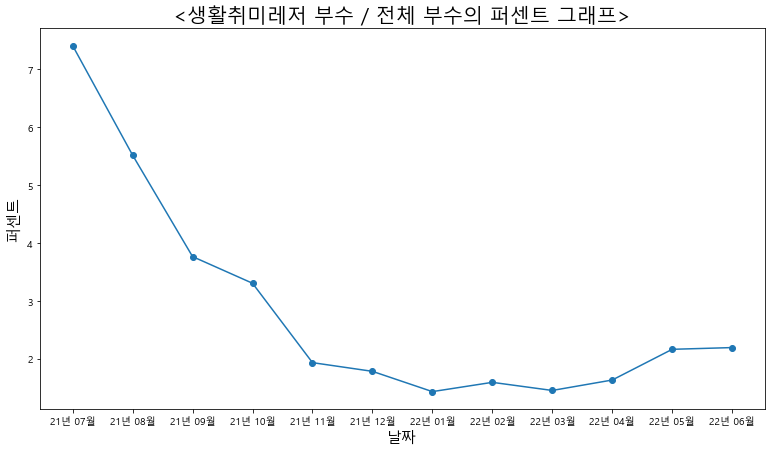

In [109]:
# 전체 부수와 생활취미레저 부수 퍼센트로 그래프 그리기
lhl_total_pct=round((lhl_press['부수_합']/total_press['부수_합'])*100,2)
plt.figure(figsize=(13,7))
plt.plot(total_press['날짜'],lhl_total_pct,'-o')
plt.title('<생활취미레저 부수 / 전체 부수의 퍼센트 그래프>',fontsize=20)
plt.ylabel('퍼센트',fontsize=15)
plt.xlabel('날짜',fontsize=15)
plt.show()

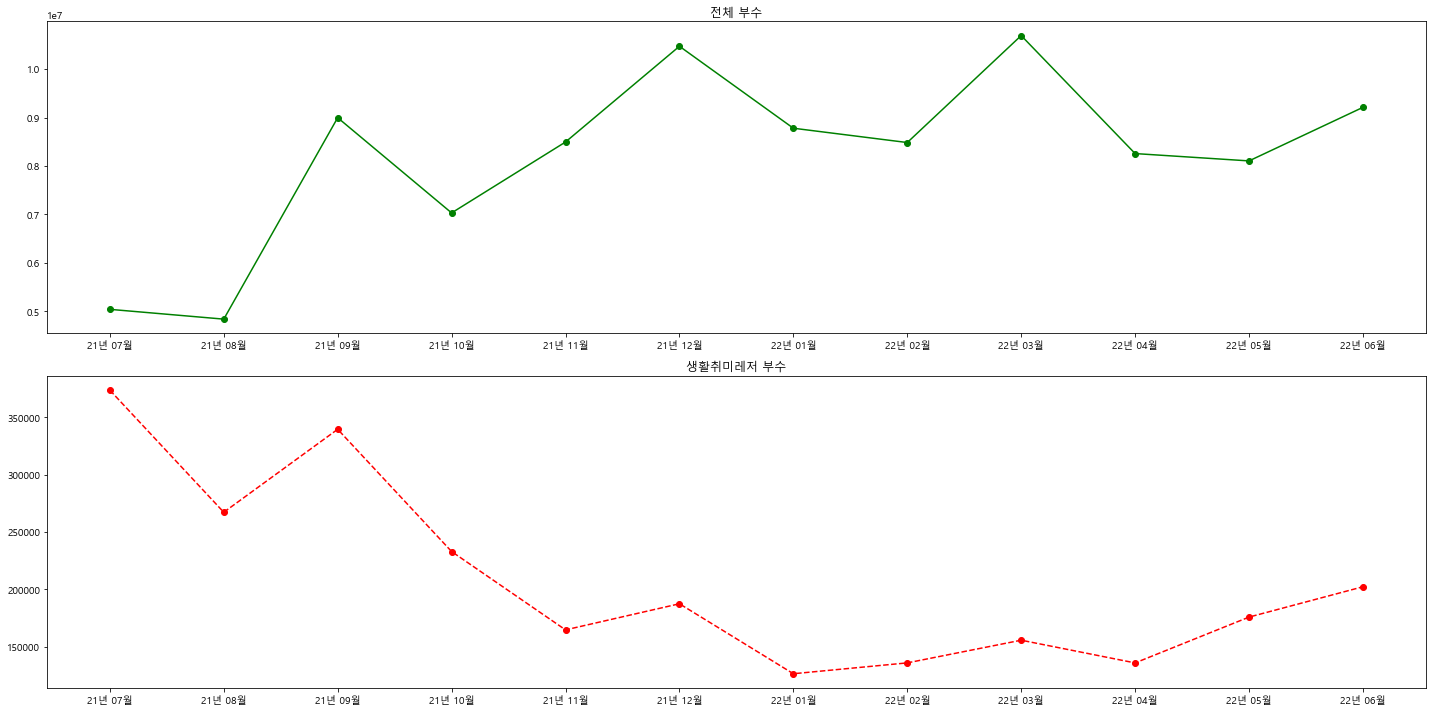

In [110]:
# 전체 부수와 생활취미레저 부수 그래프 그리기
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(2,1,1)
ax1.set_title('전체 부수')
ax1.plot(total_press['날짜'],total_press['부수_합'],'-o',color='g')

ax2=fig.add_subplot(2,1,2)
ax2.set_title('생활취미레저 부수')
ax2.plot(total_press['날짜'],lhl_press['부수_합'],'--o',color='r')

#여러개 plot 간격 자동 조절
fig.tight_layout()

# 화면 출력
plt.show()

- 21년 7월에는 다양한 분야들 중에서 7% 점유율로 괜찮았는데 꾸준히 하락하고 있는 추세입니다.
- 전체 부수가 증가하는 반면에 생활취미레저 부수가 감소하여 생활취미레저 부수 / 전체 부수의 퍼센트가 유독 낮은 것 같습니다.

## 월별 묶어서 성별, 나이별 비교

In [111]:
hl_naver

,날짜,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대
0,2021-07-09,24,14,27,29,21,25,34,19,26,23,24,17
1,2021-07-10,17,17,27,23,36,36,44,18,23,18,21,17
2,2021-07-11,20,22,24,32,42,44,45,22,28,25,27,15
3,2021-07-12,29,25,34,39,32,34,36,23,33,31,25,20
4,2021-07-13,25,20,44,34,24,26,47,24,37,33,32,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-07-05,31,25,57,56,38,64,60,15,47,53,52,25
362,2022-07-06,18,23,52,60,56,69,69,17,48,49,54,59
363,2022-07-07,55,24,51,50,53,48,44,14,48,41,43,38
364,2022-07-08,46,16,25,21,37,35,44,6,21,24,22,5


In [112]:
# 7월 제외한 나머지 행의 불린값을 리스트에 담고 7월을 제외한 행만 남도록 만들기
non_sev_month=[]
for i in hl_naver.index:  
    non_sev_month.append(hl_naver['날짜'][i].month!=7)               # 7월이 아닌 '날짜' 컬럼의 불린 값을 리스트에 담는다

# non_sev_month
hl_naver=hl_naver[non_sev_month]       # 불린 값으로 7월을 제외한 나머지 날들을 hl_naver에 저장
hl_naver

,날짜,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대
23,2021-08-01,7,40,39,40,33,25,28,21,31,23,30,23
24,2021-08-02,37,34,47,38,38,29,27,31,36,26,37,22
25,2021-08-03,20,37,46,37,38,23,35,26,37,29,32,16
26,2021-08-04,18,29,47,34,21,31,33,23,34,26,28,20
27,2021-08-05,21,38,49,29,41,29,28,31,36,26,25,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022-06-26,30,27,58,68,59,57,48,18,54,54,49,36
353,2022-06-27,56,27,63,72,47,81,44,20,52,50,68,34
354,2022-06-28,54,36,62,63,50,74,22,21,63,58,53,49
355,2022-06-29,23,19,60,65,61,42,24,26,49,50,54,37


In [113]:
# 접근자 dt를 사용해 월 정보를 새로운 컬럼으로 지정
month=hl_naver['날짜'].dt.month          # '날짜' 컬럼(시리즈)의 dt접근자를 사용해 월 정보를 month에 담는다
hl_naver.insert(1,'월',month)             # hl_naver에 1인덱스 컬럼의 컬럼명 '월'로 month 값을 넣는다

In [114]:
# '월'을 키로 그룹을 만듭니다
monthGroup=hl_naver.groupby(by='월')    # '월' 키로 하여 같은 값끼리 그룹화 한다.

In [115]:
# 확인해보기
for key, group in monthGroup:
    print(key)
    print(group)

1
            날짜  월  생활취미레저_남성_10대  생활취미레저_남성_20대  생활취미레저_남성_30대  생활취미레저_남성_40대  \
176 2022-01-01  1             36             36             71             79   
177 2022-01-02  1             61             45             92             71   
178 2022-01-03  1             37             59             90             98   
179 2022-01-04  1             46             56             98             93   
180 2022-01-05  1             49             51             99             87   
181 2022-01-06  1             44             49            100             61   
182 2022-01-07  1             25             34             74             75   
183 2022-01-08  1             38             37             61             60   
184 2022-01-09  1             20             35             53             79   
185 2022-01-10  1             40             49             93             74   
186 2022-01-11  1             46             37             98             80   
187 2022-01-12  1         

In [116]:
# '월'이 같은 것끼리 더하여 데이터 프레임 형성
month_sum=monthGroup.sum()
month_sum

,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대
월,,,,,,,,,,,,
1,986,1153,2203,2249,1973,1976,1772,1014,2391,2164,2148,1418
2,793,1061,1793,1807,1491,1546,1528,1084,1872,1562,1639,1143
3,1543,1585,2128,2169,1838,1587,1874,1401,1962,1690,2002,1188
4,1109,914,1752,1772,1481,1505,1266,700,1501,1419,1545,927
5,1031,841,1713,1640,1576,1403,1256,572,1416,1260,1448,1066
6,972,781,1731,1697,1530,1565,1098,565,1448,1378,1544,1122
8,865,1248,1437,1083,1031,879,1113,1097,1121,788,994,586
9,1002,1443,1611,1193,1073,949,1045,1333,1162,860,887,513
10,1023,1083,1456,1296,1448,1235,1114,1179,1349,1029,1037,655


In [117]:
# 성별을 분리하여 각 컬럼의 합을 구함
man=month_sum.apply(np.sum)[:6]    # 데이터 프레임을 apply하면 시리즈 단위 더한다 처음부터 5인덱스 컬럼까지
woman=month_sum.apply(np.sum)[6:]   # 데이터 프레임을 apply하면 시리즈 단위로 더한다 6인덱스 컬럼부터 끝까지

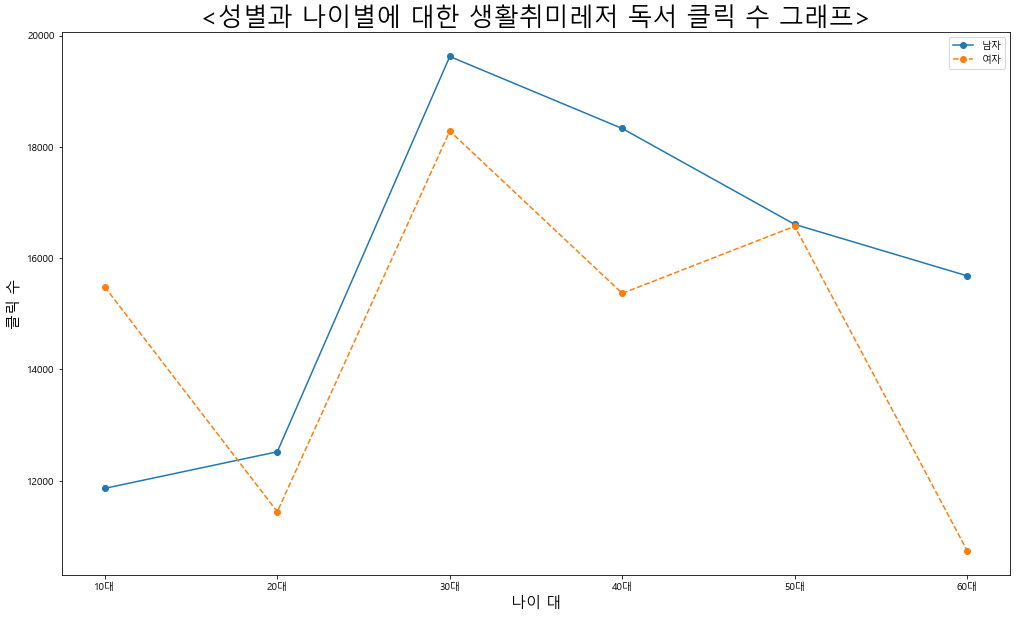

In [118]:
#성별과 나이별에 대한 생활취미레저 독서 클릭 수 그래프 그리기
plt.figure(figsize=(17,10))
plt.plot(['10대','20대','30대','40대','50대','60대'],man,'-o')
plt.plot(['10대','20대','30대','40대','50대','60대'],woman,'--o')
plt.title('<성별과 나이별에 대한 생활취미레저 독서 클릭 수 그래프>',fontsize=25)
plt.legend(['남자','여자'])
plt.ylabel('클릭 수',fontsize=15)
plt.xlabel('나이 대',fontsize=15)
plt.show()

- 대체적으로 남자가 독서 클릭 수가 많은 것을 알 수 있습니다.
- 생활취미레저 독서는 관심을 가지는 연령대가 높은 것을 알 수 있습니다.

## 클릭 수와 부수 상관계수 구하기

In [119]:
# 'month_sum'에서 행 합계(월별합계) 구해서 부수와 상관계수 비교
month_sum

,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대
월,,,,,,,,,,,,
1,986,1153,2203,2249,1973,1976,1772,1014,2391,2164,2148,1418
2,793,1061,1793,1807,1491,1546,1528,1084,1872,1562,1639,1143
3,1543,1585,2128,2169,1838,1587,1874,1401,1962,1690,2002,1188
4,1109,914,1752,1772,1481,1505,1266,700,1501,1419,1545,927
5,1031,841,1713,1640,1576,1403,1256,572,1416,1260,1448,1066
6,972,781,1731,1697,1530,1565,1098,565,1448,1378,1544,1122
8,865,1248,1437,1083,1031,879,1113,1097,1121,788,994,586
9,1002,1443,1611,1193,1073,949,1045,1333,1162,860,887,513
10,1023,1083,1456,1296,1448,1235,1114,1179,1349,1029,1037,655


In [120]:
# month_sum 각 행의 합을 구한 후 새로운 컬럼 지정
sum_month=month_sum.apply(np.sum,axis=1)
month_sum['월별_클릭합']=sum_month                   # 구한 월들의 합으로 새로운 컬럼 '월별_클릭합'으로 채운다
month_sum

,생활취미레저_남성_10대,생활취미레저_남성_20대,생활취미레저_남성_30대,생활취미레저_남성_40대,생활취미레저_남성_50대,생활취미레저_남성_60대,생활취미레저_여성_10대,생활취미레저_여성_20대,생활취미레저_여성_30대,생활취미레저_여성_40대,생활취미레저_여성_50대,생활취미레저_여성_60대,월별_클릭합
월,,,,,,,,,,,,,
1,986,1153,2203,2249,1973,1976,1772,1014,2391,2164,2148,1418,21447
2,793,1061,1793,1807,1491,1546,1528,1084,1872,1562,1639,1143,17319
3,1543,1585,2128,2169,1838,1587,1874,1401,1962,1690,2002,1188,20967
4,1109,914,1752,1772,1481,1505,1266,700,1501,1419,1545,927,15891
5,1031,841,1713,1640,1576,1403,1256,572,1416,1260,1448,1066,15222
6,972,781,1731,1697,1530,1565,1098,565,1448,1378,1544,1122,15431
8,865,1248,1437,1083,1031,879,1113,1097,1121,788,994,586,12242
9,1002,1443,1611,1193,1073,949,1045,1333,1162,860,887,513,13071
10,1023,1083,1456,1296,1448,1235,1114,1179,1349,1029,1037,655,13904


In [121]:
# 날짜 맞추기
s2021=sum_month[6:]       # 월의 순서가 21년도 8월부터 22년도 6월까지라서 구한 값들을 s2021,s2022로 나누고 두 시리즈를 concat하여 하나의 시리즈로 만든다
s2022=sum_month[:6]

s_sum=pd.concat([s2021,s2022])
s_sum

월
8     12242
9     13071
10    13904
11    15578
12    21451
1     21447
2     17319
3     20967
4     15891
5     15222
6     15431
dtype: int64

In [122]:
# 컬럼 '부수합' 시리즈의 1인덱스 부터 끝까지 인덱스를 변경시킨 후 b_sum으로 바꾼다
b_sum=lhl_press['부수_합'][1:].rename(index={2:8,3:9,4:10,5:11,6:12,7:1,8:2,9:3,10:4,11:5,12:6})
# lhl_press['부수_합'][1:]
b_sum

8     267123
9     339465
10    232869
11    164566
12    187331
1     126322
2     135781
3     155561
4     135752
5     175716
6     202162
Name: 부수_합, dtype: int64

In [123]:
# 클릭수와 부수의 상관관계
a=pd.concat([s_sum,b_sum],axis=1)    # s_sum,b_sum 두 시리즈를 열방향으로 합쳐 데이터 프레임을 만든다
a.columns=['클릭수','부수']        # 컬럼명을 지정한다

a.corr()       #상관계수를 구한다

,클릭수,부수
클릭수,1.000000,-0.658968
부수,-0.658968,1.000000


- 부수와 클릭 수의 상관계수를 비교하였습니다. 생각보다는 관계가 없다는 것을 알 수 있습니다.

# 최종

- 조사한 자료를 최종적으로 정리하면 부수와 클릭수가 생각보다는 관계가 없고
- 생활 취미 레저의 독서에 관심은 30대가 가장 많으며
- 생활 취미 레저 부수는 전체적으로 감소하는 추세입니다
- 오프라인 부수가 온라인 부수보다 많지만 현재 온라인 부수가 상승하는 추세를 보입니다.
- 따라서, 할인, 이벤트를 통해 온라인 고객들을 공략하는 것이 좋을 것 같습니다.